<a href="https://colab.research.google.com/github/vignesh-pala/NLP/blob/master/CtsNLP_Chall4_Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from urllib.request import urlopen
from bs4 import BeautifulSoup

%matplotlib inline

In [11]:
#url = Path(Path.cwd(), 'inp/leaderTalk.html')
url = '/content/leaderTalk.html'
htmlfile = open(url, encoding='utf-8')

sel_ques = 'what is your favorite thing about cognizant?'  

In [12]:
soup = BeautifulSoup(htmlfile,'html.parser')
type(soup)

In [8]:
print(soup.title)

<title>The AIM Chronicles </title>


In [10]:
#text = soup.get_text()
#print(text)

In [13]:
comments = ''
for summary in soup.findAll('table'):
    for tr in summary.find_all('tr'):
        sel_ques_flag = False
        for td in tr.find_all('td'):
            if sel_ques_flag:
                comments += td.find('p').text.lower().strip()
            if td.find('p').text.lower().strip() == sel_ques:
                sel_ques_flag = True

In [14]:
comment1 =' '
for k in comments.split(" "):
    comment1 = comment1 + ' ' + re.sub(r"[^a-zA-Z']+", ' ', k)
comment1

'  celebrating work and can do attitudepassion to challenge status quo and help customer think about possibilities of the                                                             future  we are a very ethical company  always try to do the right thing  treat people                                                             well and create the proper support system  the true testament is that my daughter                                                             joined working here in cognizant and i wouldn t let her join a company that i didn t                                                             feel good about                                                               very entrepreneurial culture  you get as much of a chance to advance yourself                                                             as you re capable of moving forward  i run my role as if it was my own company cognizant offers the ideal blend of autonomy and control that lets an individual          

In [79]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["cognizant", "company", "thing", "time", "status", "always" ,"let","re", "didn", "daughter"])

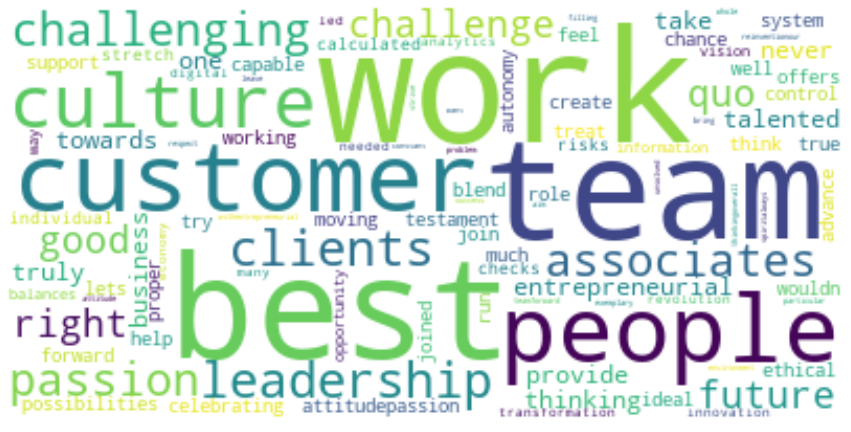

In [80]:
fig, ax = plt.subplots(figsize=(15,10 ))

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_font_size=75,max_words=100).generate(comment1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Lets have some Fun!!**
This section generates word cloud in custom format based on an input image 

In [75]:
# Read the template image
mask = np.array(Image.open("/content/Cimages2.jpg"))

(-0.5, 862.5, 845.5, -0.5)

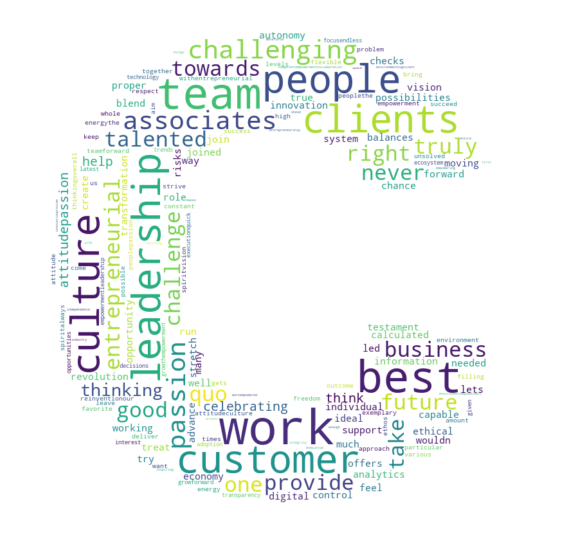

In [87]:
wordcloud_img = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_font_size=75, mask=mask).generate(comment1)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud_img, interpolation="bilinear") 
plt.axis("off")


# Can recolor it based on input image using  below steps
  # create coloring from image
  #image_colors = ImageColorGenerator(mask)
  #wordcloud_img.recolor(color_func=image_colors)